# Exercises

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

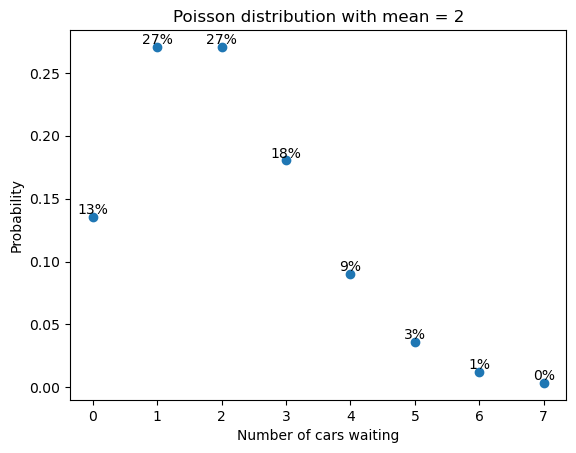

In [4]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars.
# Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set the mean of the Poisson distribution
mu = 2

# Generate the x-axis values (number of cars waiting)
x = np.arange(stats.poisson.ppf(0.001, mu), stats.poisson.ppf(0.999, mu))

# Generate the y-axis values (probability of each number of cars waiting)
y = stats.poisson.pmf(x, mu)

# Plot the distribution
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('Number of cars waiting')
ax.set_ylabel('Probability')
ax.set_title('Poisson distribution with mean = 2')

# Add text to each point
for i, j in zip(x, y):
    ax.text(i, j, str(int(j*100))+'%', ha='center', va='bottom')

plt.show()

### #1

In [5]:
# 1a. What is the probability that no cars drive up in the noon hour?

stats.poisson.pmf(0, mu)

0.1353352832366127

In [6]:
# 1b. What is the probability that 3 or more cars come through the drive through?

# Probability of more than 2, when the average is 2.
stats.poisson.sf(2, mu)

0.32332358381693654

In [7]:
# 1c. How likely is it that the drive through gets at least 1 car?

# 1 - stats.poisson.pmf(0, mu)
stats.poisson.sf(0, mu)

0.8646647167633873

### #2

In [8]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

mu = mean = 3.0
sigma = std_dev = 0.3
gpa_dist = stats.norm(mu, sigma)

In [9]:
# 2a. What grade point average is required to be in the top 5% of the graduating class?

gpa_dist.isf(0.05)

3.4934560880854417

In [10]:
# 2b. What GPA constitutes the bottom 15% of the class?

gpa_dist.ppf(0.15)

2.689069983151863

In [54]:
# 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

mu = 3.0
sigma = 0.3

# Find the range
third_decile_start = gpa_dist.ppf(0.2)
third_decile_end = gpa_dist.ppf(0.3)

print(f'Must be between {round(third_decile_start, 2)} and {round(third_decile_end, 2)}')

Must be between 2.75 and 2.84


In [12]:
# 2d. If I have a GPA of 3.5, what percentile am I in?

mean = 3.0
std_dev = 0.5
gpa = 3.5

percentile = stats.norm.cdf(gpa, mean, std_dev)

round(percentile * 100, 5)

84.13447

### #3

In [56]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs.
# How likely is it that this many people or more click through?

n = 4326
p = 0.02
k = 97

# Exactly 97?

stats.binom.pmf(97, 4326, 0.02)

0.021942930454375544

In [57]:
# Calculate the probability of observing 97 or more successes
prob = stats.binom.sf(96, 4326, 0.02)

print(prob)

0.13975823631416448


### #4

In [58]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.

# 4a. What is the probability that at least one of your first 60 answers is correct?

n = 60
p = 0.01

# Calculate the probability of getting at least one question right
prob = stats.binom.sf(0, n, p)
# prob = 1 - stats.binom.pmf(0, n, p)

prob

0.45284335760923855

### #5

In [59]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, 
# about 90% of the 3 active cohorts of 22 students visit the break area.

# How likely is it that the break area gets cleaned up each day?
# How likely is it that it goes two days without getting cleaned up? 
# All week?

probability_cleaned_by_student = 0.03
probability_students_visit_break_area = 0.9
active_cohorts = 3
students_per_cohort = 22
days_in_week = 5

# Number of students visiting the break area on any given day
students_visiting_per_day = active_cohorts * students_per_cohort * probability_students_visit_break_area

students_visiting_per_day = round(students_visiting_per_day)

In [61]:
# Calculate the likelihood of the break area getting cleaned up each day
clean_dist = stats.binom(students_visiting_per_day, probability_cleaned_by_student)
print(clean_dist.sf(0))

0.8342199288437352


In [62]:
# Calculate the likelihood of the break area not getting cleaned up for two days in a row
clean_dist = stats.binom(students_visiting_per_day * 2, probability_cleaned_by_student)

clean_dist.pmf(0)

0.027483031992576134

In [63]:
# Calculate the likelihood of the break area not getting cleaned up all week (five days)
clean_dist = stats.binom(students_visiting_per_day * 5, probability_cleaned_by_student)
print(clean_dist.pmf(0))

0.00012521651388091245


### #6

In [64]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime.
# After several weeks of careful observation, you notice that the average number of people in line when 
# your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

from scipy.stats import norm

panaderia_dist = stats.norm((15*2), (3*2))

lunch_break = 60
time_waiting = 10
time_ordering = 2
time_bank = lunch_break - time_waiting - time_ordering

time_bank = time_bank - 15

panaderia_dist.cdf(time_bank)

0.6914624612740131

### #7

In [18]:
# 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation.
# For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution
# defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

from env import db_url
import pandas as pd 
import numpy as np

emp = db_url('employees')

query = "SELECT * FROM salaries WHERE to_date > now()"

salaries_df = pd.read_sql(query, emp)

In [19]:
salaries_df.shape

(240124, 4)

In [67]:
mean_salary = salaries_df['salary'].mean()
std_dev_salary = salaries_df['salary'].std()

# Modeling the salaries as a normal distribution
salary_distribution = stats.norm(mean_salary, std_dev_salary)

# Calculate the average salary and standard deviation of the modeled distribution
modeled_mean_salary = salary_distribution.mean()
modeled_std_dev_salary = salary_distribution.std()

print(f'Mean:', modeled_mean_salary)
print(f'Std Dev:', modeled_std_dev_salary)

Mean: 72012.23585730705
Std Dev: 17309.995380251985


In [68]:
# 7a. What percent of employees earn less than 60,000?

round(stats.norm(modeled_mean_salary, modeled_std_dev_salary).cdf(60_000), 5) * 100

24.386

In [22]:
# 7b. What percent of employees earn more than 95,000?

round(stats.norm(modeled_mean_salary, modeled_std_dev_salary).sf(95_000), 5) * 100

9.209

In [69]:
# 7c. What percent of employees earn between 65,000 and 80,000?

above_65k = stats.norm(modeled_mean_salary, modeled_std_dev_salary).sf(65_000 - 1)
above_80k = stats.norm(modeled_mean_salary, modeled_std_dev_salary).sf(80_000 - 1)

between = above_65k - above_80k

round(between, 5) * 100


33.506

In [24]:
# 7d. What do the top 5% of employees make?

round(stats.norm(modeled_mean_salary, modeled_std_dev_salary).isf(0.05), 2)

100484.64

Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

# Notes (Interacting with Distributions)

### Helpful Infographics

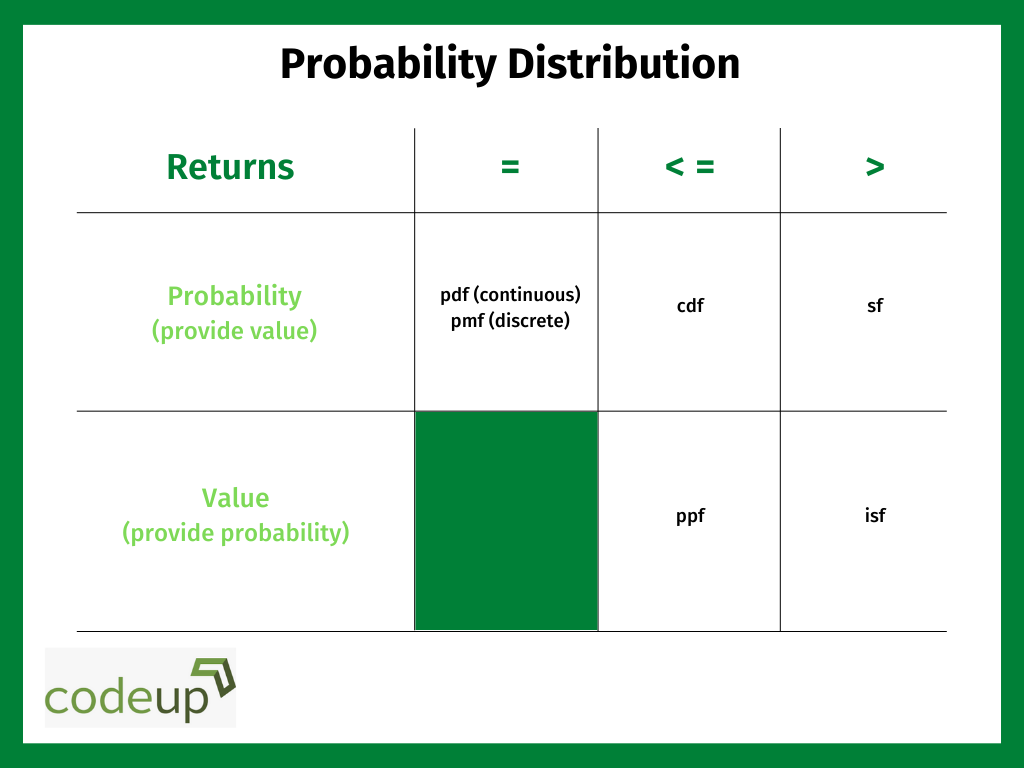

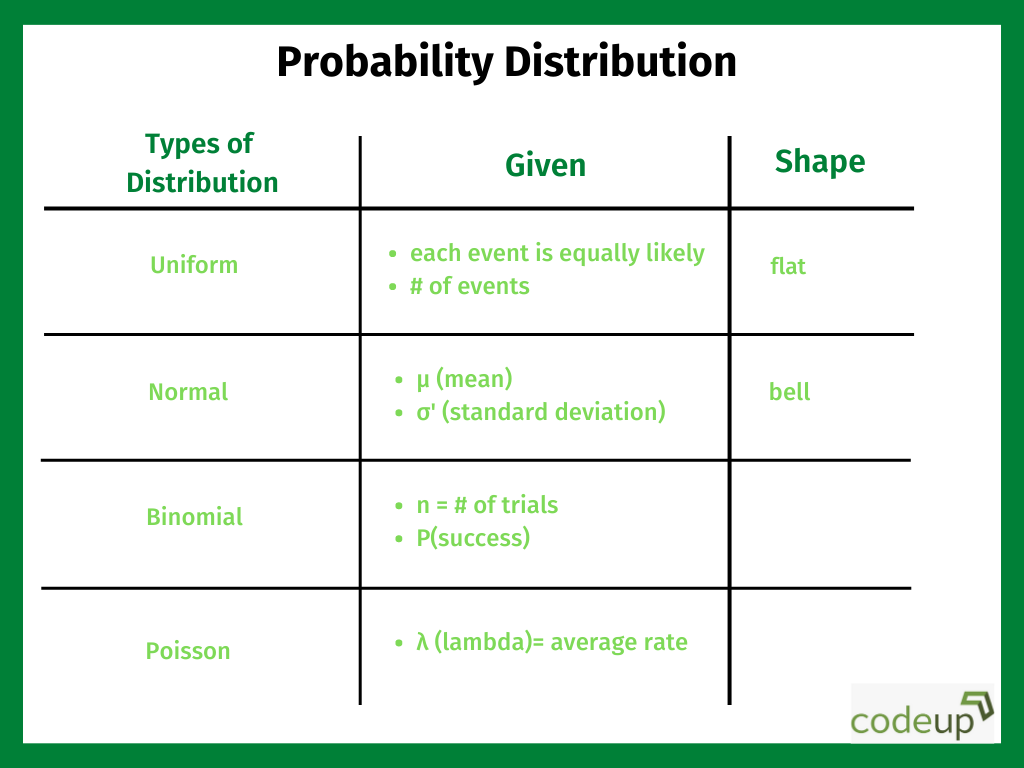

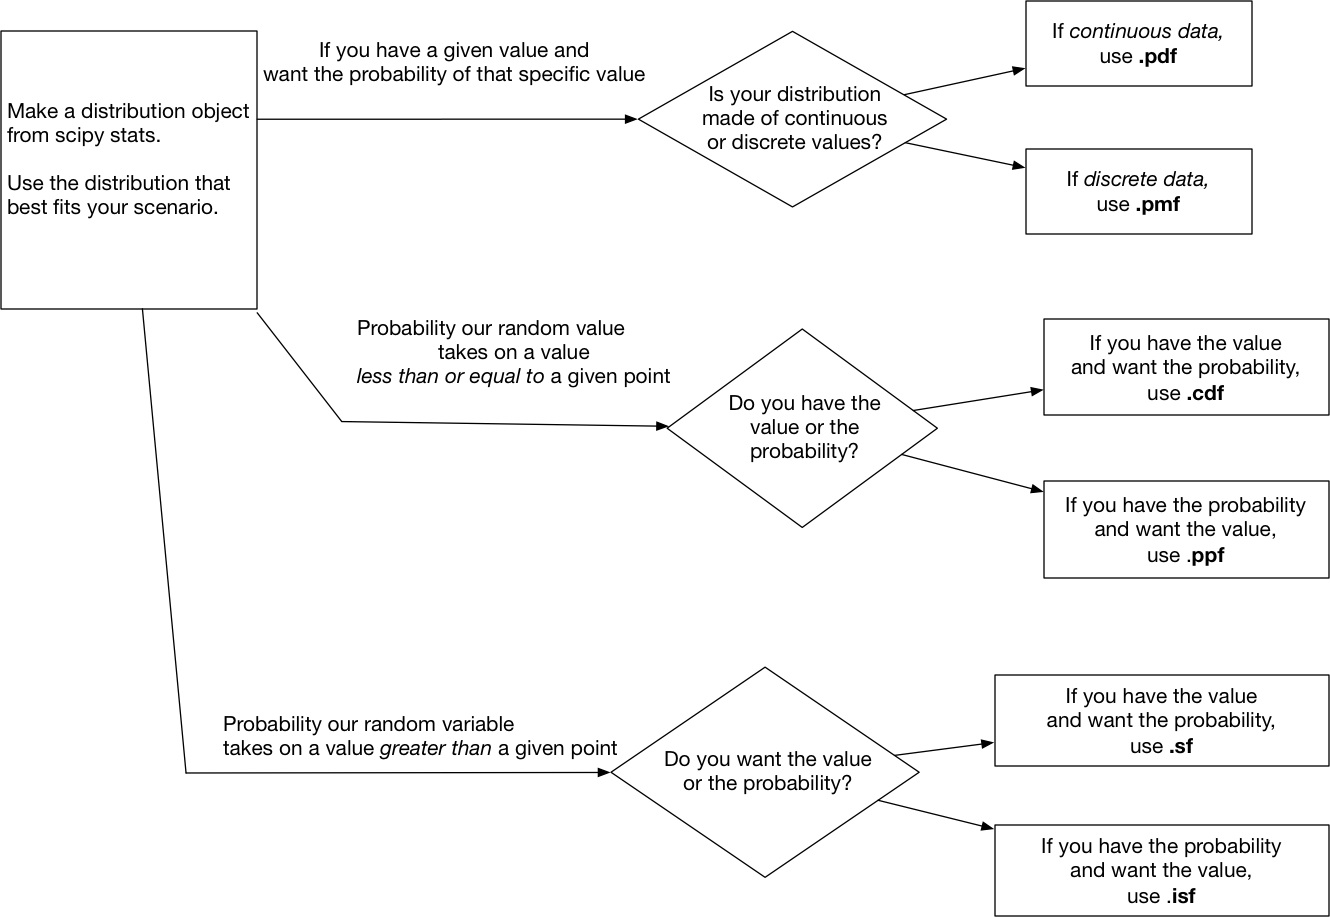

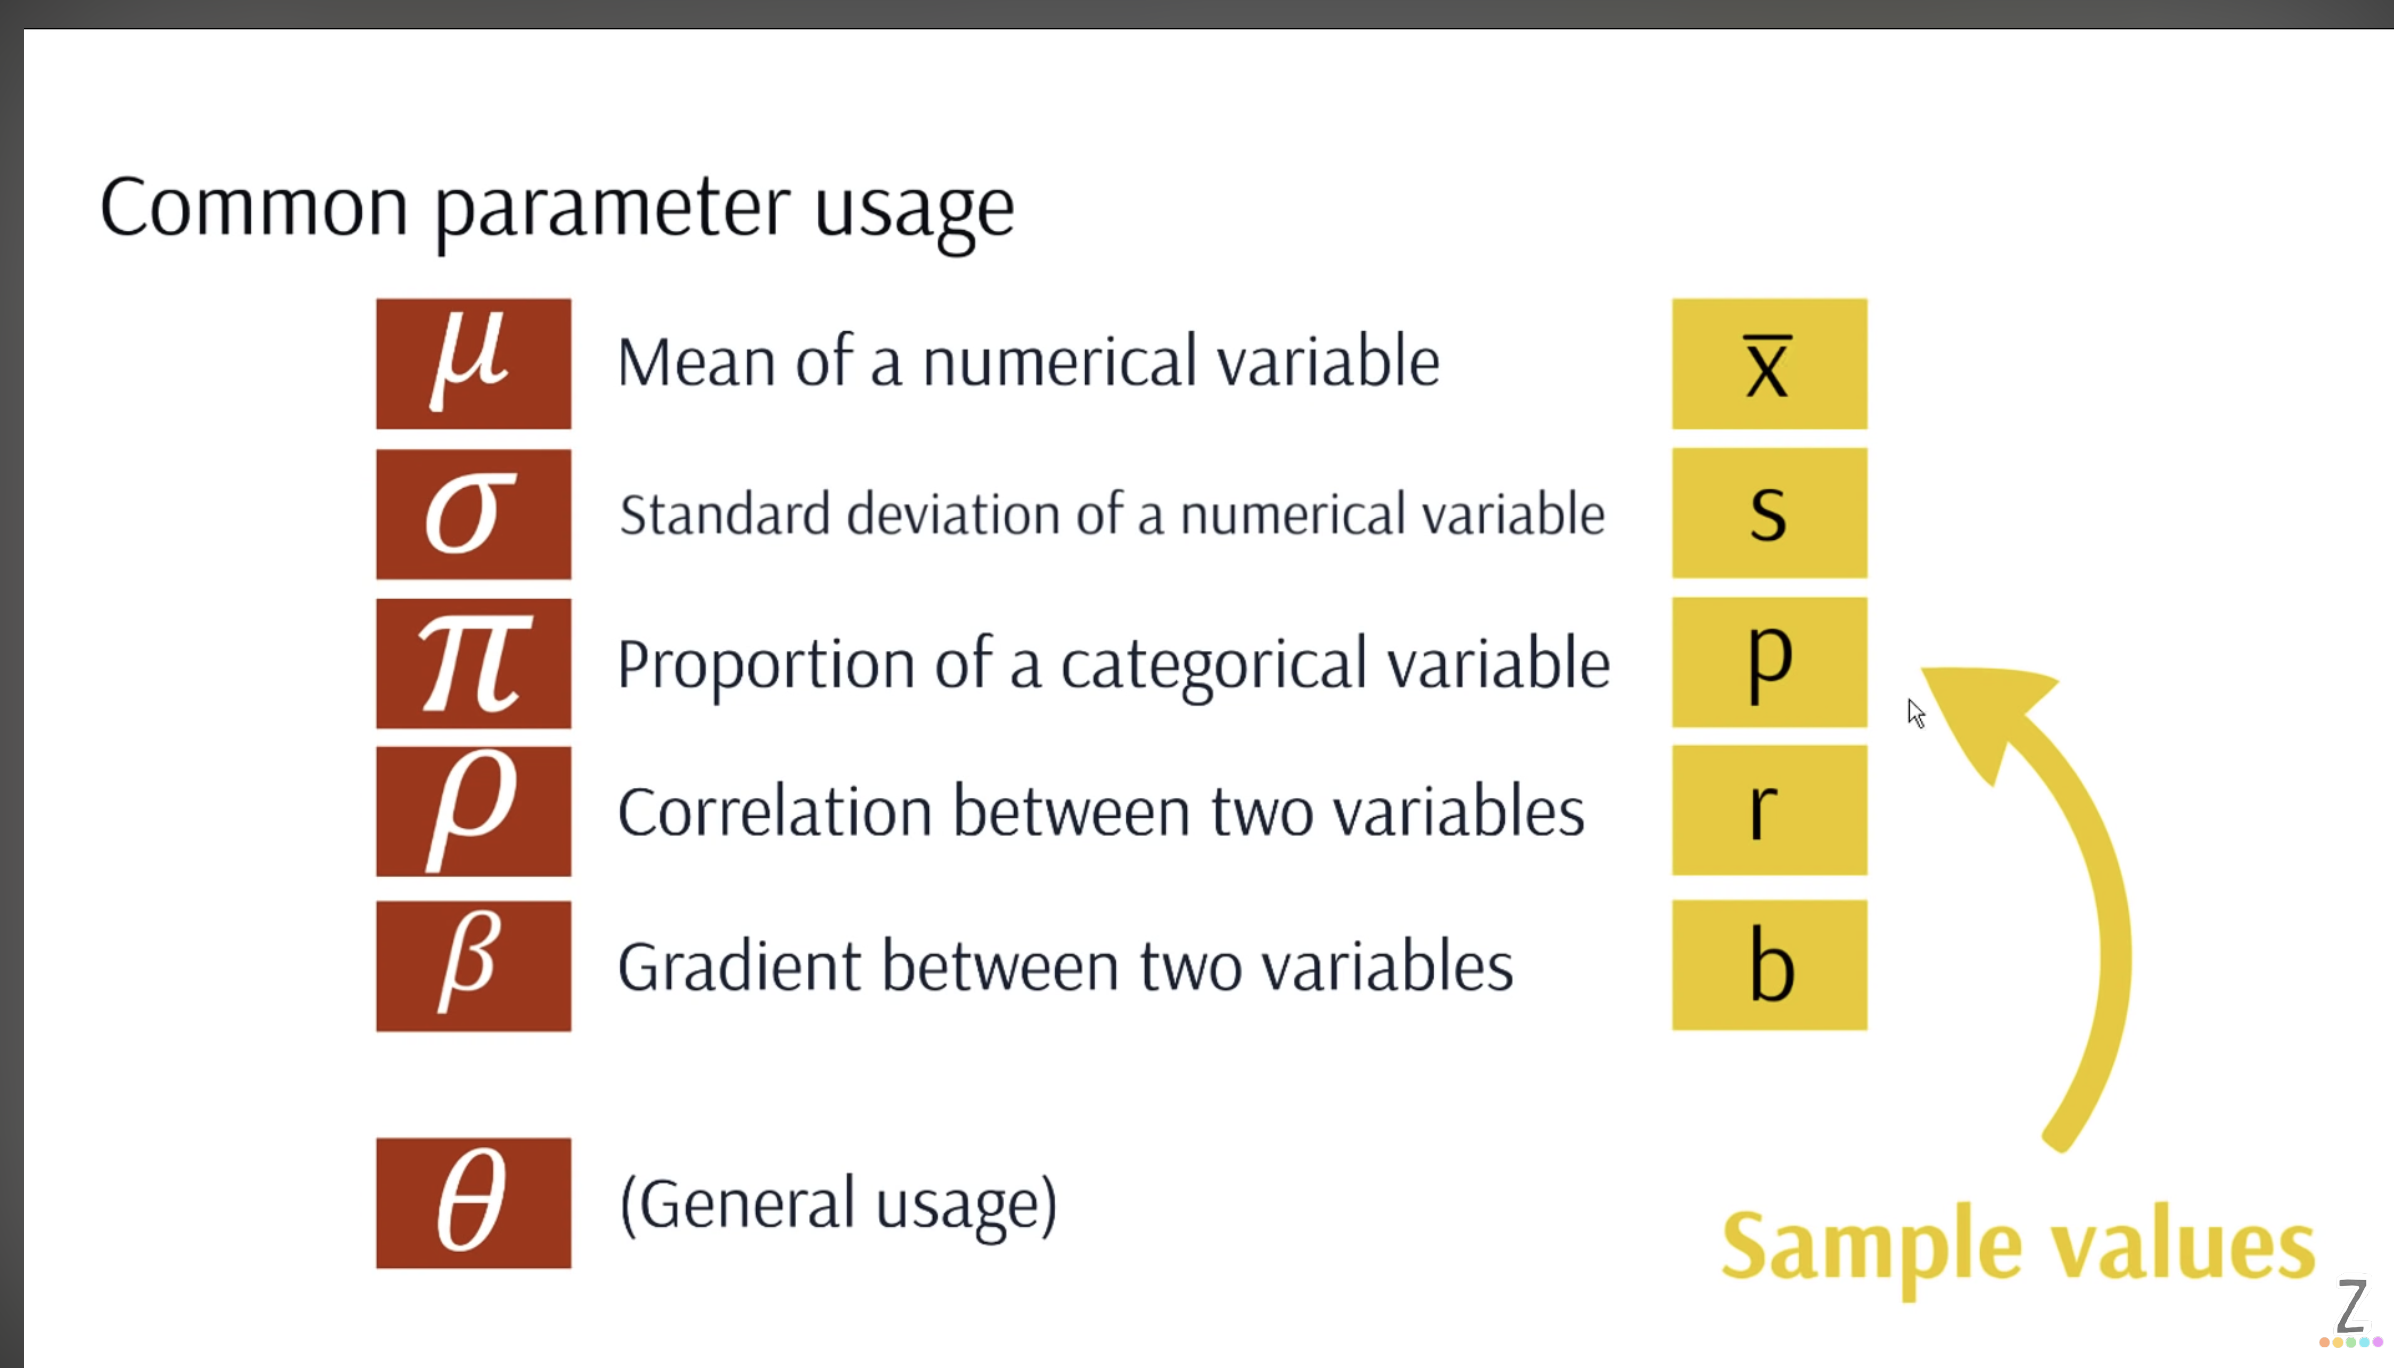

### Definitions

#### `rvs`

is a method of a random variable object in the `scipy.stats` module that generates random numbers from a probability distribution. For example, `scipy.stats.norm.rvs()` generates random numbers from a normal distribution.

In [25]:
import numpy as np
from scipy import stats

# Create a dice role using stats and rvs
dice_roll = stats.randint(1, 7)

# Generate 10,000 dice rolls using rvs
dice_rolls_1000 = dice_roll.rvs(size = 1_000)

#### `pmf` - probability mass function *(Discrete Variable)*

It is a function that gives the probability of a discrete random variable taking a specific value. All add up to 1.

**Bernoulli: single trial of an outcome's success/failure**

**Binomial: Many different trials. Win probability. Coin flips.**

In [26]:
# Chance to roll a 3 on a dice using pmf?

dice_roll.pmf(3)

0.16666666666666666

#### `pdf` - probability density function *(Continuous Variable)*

The PDF gives the relative likelihood of a continuous random variable taking on a given value, but does not give the probability of an exact number. 

Cannot use dice roll, because dice rolls are discrete variables (Cannot roll a 2.3)

Using `stats.norm()`

*Suppose that a store's daily sales are normally distributed with a mean of **12,000 dollars** and standard deviation of **2000** dollars.*

To create a normal distribution object with a mean of **12,000** and standard deviation of **2000**, you can use norm:

In [27]:
# stats.norm takes the mean, and the standard deviation

mean = 12000
sd = 2000

daily_sales = stats.norm(mean, sd)

In [28]:
# What are the chances that the daily sales are exactly 10,000?

daily_sales.pdf(10_000)

0.00012098536225957169

#### `cdf` - cumulative distribution function <u>FINDING BOTTOM PERCENTAGE</u>

It is a function that gives the probability that a random variable is less than or equal to a specific value.

*If you include the last variable (and everything before since it is CUMULATIVE, it needs to equal 1)*

**Normal distribution: height, standardized test scores. *Area under curve = 1***

In [29]:
# Chance to roll a 3 or less? (This is 1, 2, or 3 and NOT 4, 5, 6 so it is 50%)

dice_roll.cdf(3)

0.5

#### `ppf` - percent point function <u>BOTTOM PERCENTAGE GIVEN</u>

...or inverse cumulative distribution function. It is the inverse of the `cdf` function, and gives the value of the random variable that corresponds to a specific probability. 

In [30]:
# Everything below this point cumulatively

dice_roll.ppf(0.16)

1.0

#### `sf` - survival function <u>FINDING TOP PERCENTAGE</u>

...or complementary cumulative distribution function. It is a function that gives the probability that a random variable is greater than a specific value. 

In [31]:
# This is the opposite of CDF and is NOT inclusive. This will start after the input number. 
# For example, the chance of 4, 5, 6 on a dice will be input as:

dice_roll.sf(3)

0.5

#### `isf` - inverse survival function <u> TOP PERCENTAGE GIVEN </u>

...or inverse complementary cumulative distribution function. It is the inverse of the `sf` function, and gives the value of the random variable that corresponds to a specific probability. 

In [32]:
# What is in the top 10% of a cumulative dice roll?

dice_roll.isf(0.1)

6.0

# Notes (Types of Distributions)

### Binomial Distributions

The binomial distribution lets us model the number of successes after a number of trials, given a certain probability of success. The classic example of this is the number of heads you would expect to see after flipping a coin a certain number of times.

A binomial distribution is defined by a number of trials, and a probability of success. These two pieces of information are what we need in order to model a problem with the binomial distribution.

In [33]:
# Here we have a probability of success, 0.25, and a number of trials, 30. 
# We'll define X as the number of questions we get right on the test. 
# We want to know the probability that X > 10, which tells us we want to use the survival function.

number_of_trials = n = 30
probability_of_success = p = 0.25
probability_of_x_greater_than_ten = px = 10

stats.binom(n, p).sf(px)

0.10572812269266013

In [34]:
# Here we define a "success" as a student showing up late, and this outcome has a probability of 0.05. 
# We want to know what the probability of 0 successes is. 
# We now have all the pieces we need to use the binomial distribution to answer the question.

number_of_trials = n2 = 30
probability_of_occurence = p2 = 0.05
probability_of_zero_occurrence = px2 = 0

stats.binom(n2, p2).pmf(px2)

0.21463876394293727

### Normal Distributions

The normal distribution models a continuous random variable where the further away from the mean you are, the less likely the outcome. This is commonly referred to as the "bell curve", and many continous variables tend to follow a normal distribution.

A normal distribution is defined by a mean and a standard deviation. The standard normal distribution is a normal distribution with a mean of 0 and standard deviation of 1.

In [35]:
# Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. 
# How much would the daily sales have to be to be in the top 10% of all days?

mu = mean = 12000
sigma = stddeviation = 2000

sales = stats.norm(mu, sigma)

top10percent = sales.isf(0.1)

print(top10percent)

14563.103131089201


### Poisson Distributions

The poisson distribution lets us model a situation where a certain number of events happen over a specified time interval1. The number of events that happen is a discrete measure, and this distribution can tell us the likelihood of a certain number of events occuring over the time period.

The poisson distribution assumes that the events are indpendent of each other and independent of the time since the last event. We must also know the average rate to use a poisson distribution.

In [36]:
# Codeup knows that, on average, students consume 5 lbs of coffee per week. 
# How likely is it that the coffee consumption for this week is only 3 lbs?

mu = mean = 5

stats.poisson(5).pmf(3)

0.1403738958142805

# Mini Exercises

Using `stats.norm()`

*Suppose that a store's daily sales are normally distributed with a mean of **12,000 dollars** and standard deviation of **2000** dollars.*

To create a normal distribution object with a mean of **12,000** and standard deviation of **2000**, you can use norm:

## Mini Exercise:

In [37]:
# The average battery life for a fully charged iphone-12 is 14 hours with standard deviation of 1.5 hour**

# 1. What kind of probability distribution represents the random variable "battery life in hours"?**

    # Normal distribution because battery life follows a continuous distribution.

# 2. What are the appropriate defining parameters for this distribution?**

    # Mean (μ): The average battery life for a fully charged iPhone-12, which is 14 hours in this case.
    # Standard deviation (σ): The standard deviation of the battery life, which is 1.5 hours in this case.

    # N(μ=14, σ=1.5).

In [38]:
# 3. Create a Scipy object/instance for this distribution**

import scipy.stats as stats

# Create a Scipy object/instance for the normal distribution

batlife = stats.norm(loc=14, scale=1.5)

In [39]:
# 4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:

# Define the parameters of the normal distribution
mu = 14
sigma = 1.5

In [40]:
# Create a Scipy object/instance for the normal distribution
battery_life_dist = stats.norm(mu, sigma)

In [41]:
# a. Probability that the cell phone battery lasts more than 16 hours
battery_life_dist.sf(16)

0.09121121972586788

In [42]:
# b. Probability that the cell phone battery lasts exactly 12 hours
battery_life_dist.pdf(12)

0.10934004978399577

In [43]:
# c. Probability that the cell phone battery lasts 12 hours or less
battery_life_dist.cdf(12)

0.09121121972586788

In [44]:
# d. Hours that the battery lasts for top 25% longest lasting phones
battery_life_dist.ppf(0.75)
    #OR
battery_life_dist.isf(0.25)

15.011734625294123

In [45]:
# Binomial Distribution
# The classic example of this is the number of heads you would expect to see after flipping a coin a certain number of times.

In [46]:
# You are taking a multiple choice test consisting of 30 questions that you forgot to study for.
# Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

trials = 30
chance_of_success = 0.25

# Chance of getting more than 10 correct?

more_than_this_many_correct = 10

stats.binom(trials, chance_of_success).sf(more_than_this_many_correct)

0.10572812269266013

## Mini Exercise (Binomial Distribution)

In [47]:
# The probability that a visitor will make a purchase when browsing in your web-store is 1.5%. You expect 350 web-visitors today 


# 1. What kind of probability distribution you have for "# number of visitors who end up making a purchase"?

    # Binomial. Either make a purchase or not. No contingency.

import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the parameters of the binomial distribution
trials = 350 # 350 visitors
probability = 0.015 # 1.5% chance of purchase

# Create a Scipy object/instance for the binomial distribution
visitors_dist = stats.binom(trials, probability)

In [48]:
# a. Probability that exactly 10 visitors will make a purchase
prob_exactly_10 = visitors_dist.pmf(10)

In [49]:
# b. Probability that 13 or more visitors will make a purchase
visitors_dist.sf(12)

0.0028028606293498573

In [50]:
# c. Probability that 10 or less visitors will make a purchase
prob_10_or_less = visitors_dist.cdf(10)

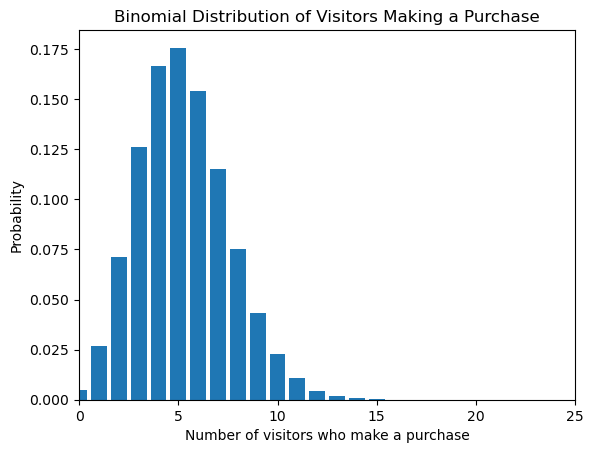

In [51]:
# d. Visualize the resulting distribution
x = range(trials)
plt.bar(x, visitors_dist.pmf(x))
plt.xlabel("Number of visitors who make a purchase")
plt.ylabel("Probability")
plt.title("Binomial Distribution of Visitors Making a Purchase")
plt.xlim(0, 25)
plt.show()